# Set Cover problem

In [1963]:
from random import random, seed
from itertools import product
import numpy as np
from tqdm.auto import tqdm
from icecream import ic
import matplotlib.pyplot as plt
from itertools import accumulate

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [1964]:
UNIVERSE_SIZE = 100_000
NUM_SETS = 10_000
DENSITY = 0.3

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [1965]:
# DON'T EDIT THESE LINES!

SETS = rng.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[rng.integers(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

## Helper Functions

In [1966]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

## Resolution

In [1967]:
#Tweak function
def tweak(solution: np.ndarray , T: float ) -> np.ndarray:
    mask = rng.random(NUM_SETS) < T
    if not mask.any():
        mask[rng.integers(NUM_SETS)] = True
    return np.logical_xor(solution,mask)

In [1968]:
def fitness(solution: np.ndarray):
        is_valid = valid(solution)
        cost_value = cost(solution)
      
        return is_valid, -cost_value, np.sum(solution)
       

In [1969]:
BUFFER_SIZE = NUM_SETS
buffer = np.zeros(BUFFER_SIZE, dtype=bool)
Temp = 0.5
solution = rng.random(NUM_SETS) < 0.75

while not valid(solution):
    solution[rng.integers(NUM_SETS)] = True

current_fitness = fitness(solution)
history = [current_fitness]
print(f"Initial fitness : {fitness(solution)}")
print(f"Initial cost : {cost(solution)}")

for n in tqdm(range(UNIVERSE_SIZE)):
    new_solution = tweak(solution, Temp)
    new_fitness = fitness(new_solution)

    history.append(new_fitness)
    fitness_increased = new_fitness > current_fitness

    if fitness_increased:
        solution = new_solution
        current_fitness = new_fitness

    buffer[-1] = fitness_increased
    buffer = np.concatenate((buffer[1:], np.array([False])))

    buffer_sum = buffer.sum()
    if buffer_sum > BUFFER_SIZE / 5:
        Temp *= 1.2
    elif buffer_sum < BUFFER_SIZE / 5:
        Temp /= 1.2
          
print(f"Final fitness : {fitness(solution)}")
print(f"Final cost : {cost(solution)}")
print(f"Number of sets used: {solution.sum()} over {NUM_SETS}")
print(f"Last improvement at: {history.index(fitness(solution))}")

Initial fitness : (np.True_, np.float64(-628947781.6178495), np.int64(7478))
Initial cost : 628947781.6178495


100%|██████████| 100000/100000 [51:43<00:00, 32.23it/s] 

Final fitness : (np.True_, np.float64(-2102807.146374947), np.int64(25))
Final cost : 2102807.146374947
Number of sets used: 25 over 10000
Last improvement at: 68688


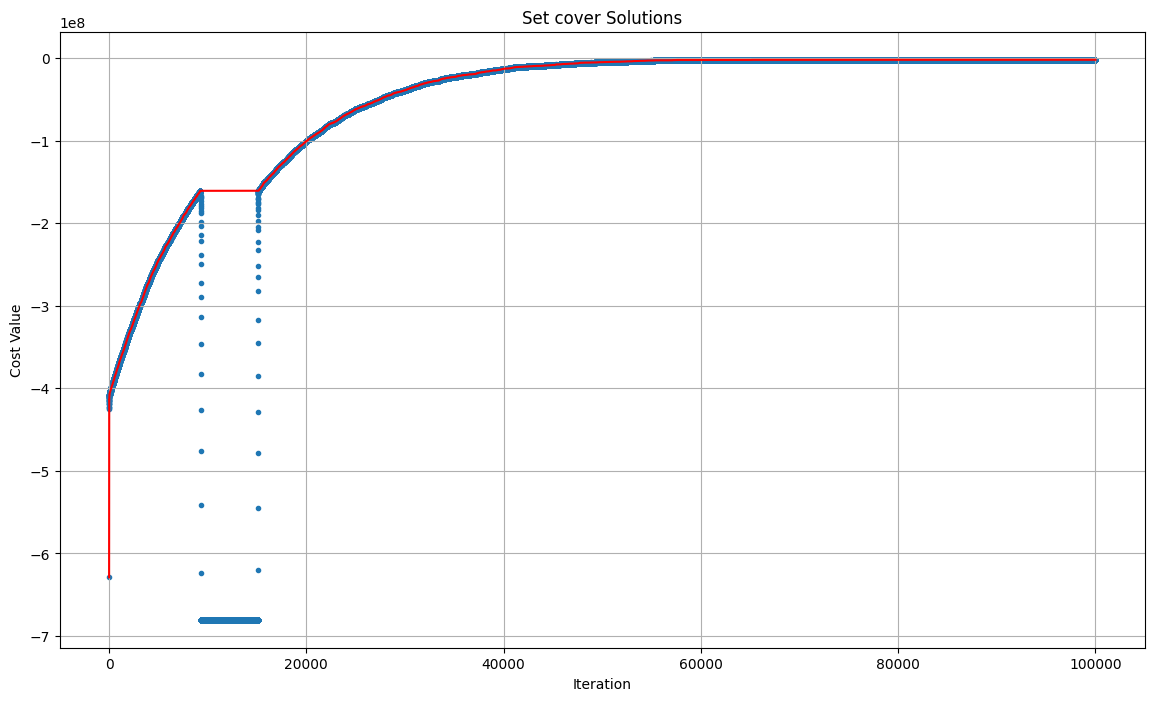

In [1970]:
#Array of accumulated valid minimum solutions costs
valid = [sol[1] for sol in list(accumulate(history, max))]
#Array of all costs only
costs = [sol[1] for sol in history]
#Plot
plt.figure(figsize=(14, 8))             
plt.title("Set cover Solutions")
plt.grid()
plt.plot(
    range(len(history)),
    valid,
    color="red",
)
plt.scatter(range(len(costs)), costs, marker=".")

plt.xlabel('Iteration')
plt.ylabel('Cost Value')
plt.savefig(f'plots/Solutions_{UNIVERSE_SIZE}_{NUM_SETS}_{DENSITY}.jpg')

Text(0, 0.5, 'Sets Value')

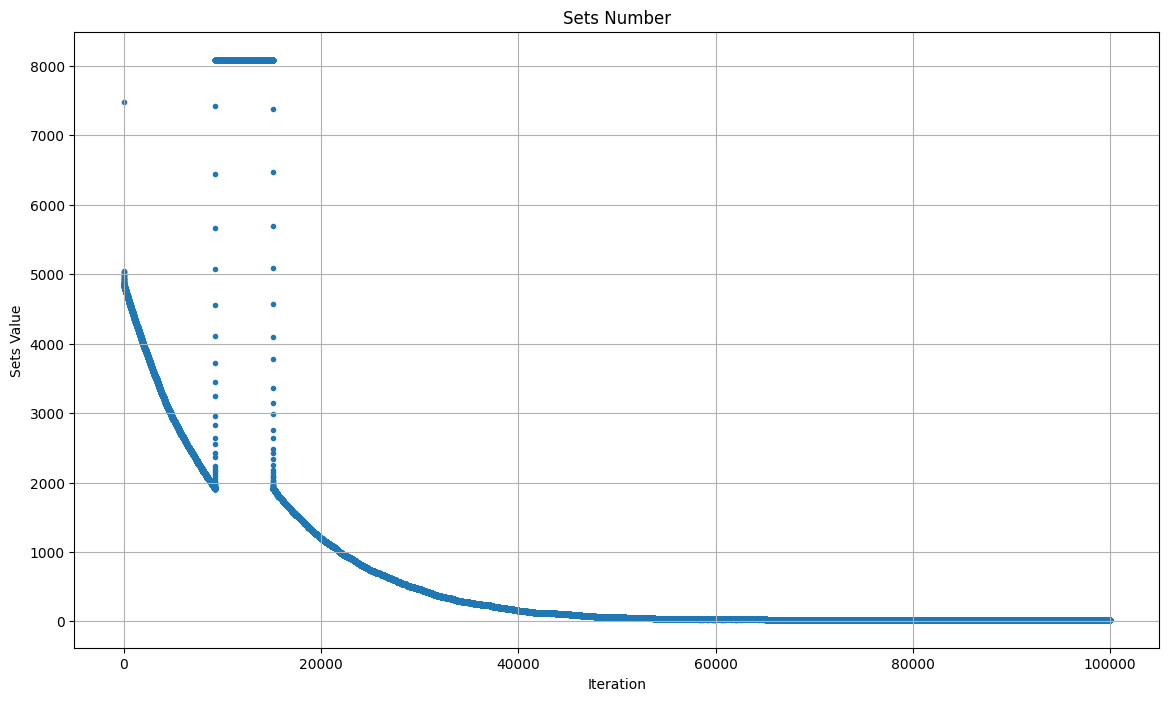

In [1971]:
sets = [sol[2] for sol in history]

plt.figure(figsize=(14, 8))             
plt.title("Sets Number")
plt.grid()

plt.scatter(range(len(sets)), sets, marker=".")

plt.xlabel('Iteration')
plt.ylabel('Sets Value')